# Problem Description
The problem is to predict annual water usage.

The dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.

In [47]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
#load the dataset
df=pd.read_csv("yearly-water-usage.csv",index_col=0)
df.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [49]:
#rows and columns
df.shape

(79, 1)

In [50]:
df.isnull().sum()

Water    0
dtype: int64

No null values

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1885 to 1963
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Water   79 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [52]:
#prepare the data
X=df.values
X = X.astype('float32')

In [53]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [54]:
# walk-forward validation
history = [x for x in train]
predictions = list()

In [55]:
for i in range(len(test)):
    # predict
    ypred = history[-1] # using the last i.e 39th record to predict 40th record
    predictions.append(ypred)

    # observation
    obs = test[i]  # test has data from 40th record
    history.append(obs)
    print('>Predicted= ' ,ypred, 'Expected= ', obs)

>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [503.]
>Predicted=  [503.] Expected=  [450.]
>Predicted=  [450.] Expected=  [432.]
>Predicted=  [432.] Expected=  [432.]
>Predicted=  [432.] Expected=  [458.]
>Predicted=  [458.] Expected=  [462.]
>Predicted=  [462.] Expected=  [503.]
>Predicted=  [503.] Expected=  [488.]
>Predicted=  [488.] Expected=  [466.]
>Predicted=  [466.] Expected=  [492.]
>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [515.]
>Predicted=  [515.] Expected=  [500.]
>Predicted=  [500.] Expected=  [522.]
>Predicted=  [522.] Expected=  [575.]
>Predicted=  [575.] Expected=  [583.]
>Predicted=  [583.] Expected=  [587.]
>Predicted=  [587.] Expected=  [628.]
>Predicted=  [628.] Expected=  [640.]
>Predicted=  [640.] Expected=  [609.]
>Predicted=  [609.] Expected=  [606.]
>Predicted=  [606.] Expected=  [632.]
>Predicted=  [632.] Expected=  [617.]
>Predicted=  [617.] Expected=  [613.]
>Predicted=  [613.] Expected=  [598.]
>Predicted= 

In [60]:
metrics.mean_squared_error(test,predictions)

469.075

In [61]:
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

21.65813962941026

In this above case, we can see that the persistence model achieved an RMSE of 21.658. This means that on average, the model was wrong by about 22 liters per capita per day for each prediction made.

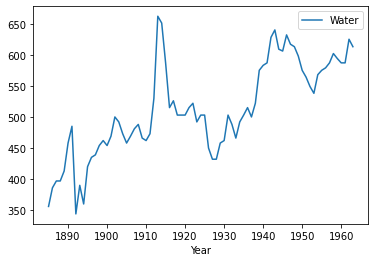

In [64]:
#now to check the trend/seasonality - the best way is to plot the line graph

df.plot()
plt.show()

OBSERVATIONS:

1.There looks to be an increasing trend in water usage over time.

2.There do not appear to be any obvious outliers, although there are some large fluctuations.

3.There is a downward trend for the periods 1915 to 1930, 1945 to 1955.

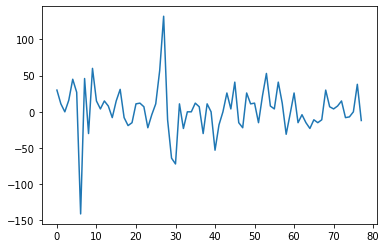

In [67]:
# Differencing data to make the time series stationary
# this would help us in reducing the trend
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

stationary = pd.DataFrame(diff)

# plot differenced data
stationary.plot(legend=False)
plt.show();

In [70]:
from statsmodels.tsa.stattools import adfuller

# check for Stationarity
X = stationary.iloc[ : , 0].values
#print(X) 
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print('Critical Values:' ,result[4])

## result[2], [3]  -> lags , nobs respectively 

ADF Statistic: -6.693248
p-value: 0.000000
Critical Values:
Critical Values: {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}


The results show that the **test statistic value -6.055566 is smaller than the critical value at 1% of -3.535**. This suggests that we can reject the null hypothesis with a significance level of less than 1%. or Accept the Alternate Hypothesis with 99% confidence.